In [1]:
import os
import glob
import cv2
import re
import numpy as np
import pylab as pl

In [2]:
natsort = lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]

# Basler - tiff files

In [3]:
ms_between_frames = 33
fps = 1000/ms_between_frames #float((metadata['frame_rate']))

In [4]:
rootdir = '/mnt/sda/Videos' 
# acquisition='20220216_1100_yak_4do_gh'
acquisition='20220217-1704_sant_7do_sh'
#acquisition='test'

basedir = os.path.join(rootdir, 'bananagar')
frame_dir = os.path.join(basedir, acquisition)

# frame_prefix = 'Basler_acA4096-30uc__40158811__20220216_110406080'
frame_prefix = 'Basler_acA4096-30uc__40158811__20220217_170840903'

outfile = os.path.join(basedir, '%s.mp4' % acquisition)
print(outfile)

nframes = len(os.listdir(frame_dir))
print("%s frames to combine" % nframes)

/mnt/sda/Videos/bananagar/20220217-1704_sant_7do_sh.mp4
20740 frames to combine


In [ ]:

frame_paths = sorted(os.listdir(frame_dir), key=natsort)
fp = os.path.join(frame_dir, frame_paths[0])
img_bgr = cv2.imread(fp)
im = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(im.shape)

pl.figure()
pl.imshow(im[0:1600, 0:1600])

In [8]:
frame_dir

'/mnt/sda/Videos/bananagar/20220217-1704_sant_7do_sh'

In [9]:
dst_dir  = '%s__cropped' % frame_dir
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)
print(dst_dir)

/mnt/sda/Videos/bananagar/20220217-1704_sant_7do_sh__cropped


In [13]:
for f in frame_paths:
    # f = frame_paths[0]
    fp = os.path.join(frame_dir, f)
    im= cv2.imread(fp)
    #m = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # dont switch if writing directly
    _, fn = os.path.split(f)

    cv2.imwrite(os.path.join(dst_dir, fn), im[0:1600, 0:1600])



In [16]:
frame_dir = dst_dir
frame_dir

'/mnt/sda/Videos/bananagar/20220217-1704_sant_7do_sh__cropped'

In [17]:
len(os.listdir(frame_dir))

20740

In [18]:
outfile = os.path.join(basedir, '%s__cropped.mp4' % acquisition)
print(outfile)

/mnt/sda/Videos/bananagar/20220217-1704_sant_7do_sh__cropped.mp4


In [19]:
cmd='ffmpeg -y -r '+ '%.2f' % fps + ' -i ' + '%s/%s_' % (frame_dir, frame_prefix) +'%04d.tiff -vcodec libx264 -f mp4 -pix_fmt yuv420p ' + outfile
print(cmd)

ffmpeg -y -r 30.30 -i /mnt/sda/Videos/bananagar/20220217-1704_sant_7do_sh__cropped/Basler_acA4096-30uc__40158811__20220217_170840903_%04d.tiff -vcodec libx264 -f mp4 -pix_fmt yuv420p /mnt/sda/Videos/bananagar/20220217-1704_sant_7do_sh__cropped.mp4


In [20]:
os.system(cmd)

0

# Basler - png files

In [7]:
rootdir = '/mnt/sda/Videos' 

found_acqs = sorted(glob.glob(os.path.join(rootdir, 'sound-chamber', '2022*', 'frames')), key=natsort)

needs_movie =[f for f in found_acqs if len(glob.glob(os.path.join(os.path.split(f)[0], '*.mp4')))==0]
needs_movie

['/mnt/sda/Videos/sound-chamber/20220201-1440_ctns_7do_sh/frames',
 '/mnt/sda/Videos/sound-chamber/20220201-1616_sim_5do_sh/frames',
 '/mnt/sda/Videos/sound-chamber/20220205-1608_ctns_5do_sh/frames',
 '/mnt/sda/Videos/sound-chamber/20220205-1615_ctns_5do_sh_1x2/frames',
 '/mnt/sda/Videos/sound-chamber/20220205-1638_ctns_5do_sh_1x1/frames',
 '/mnt/sda/Videos/sound-chamber/20220219-1252_yak_3do_gh/frames',
 '/mnt/sda/Videos/sound-chamber/20220219-1255_yak_3do_gh_1252pair-banana-near/frames',
 '/mnt/sda/Videos/sound-chamber/20220219-1308_yak_3do_gh_banana-in/frames',
 '/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames',
 '/mnt/sda/Videos/sound-chamber/20220220-1118_yak_4do_gh/frames',
 '/mnt/sda/Videos/sound-chamber/20220220-1200_ctns_4do_gh/frames',
 '/mnt/sda/Videos/sound-chamber/20220220-1225_ctns_8do_gh/frames']

In [29]:
acquisition = '20220220-1038_yak_4do_gh'
fpaths = sorted(glob.glob(os.path.join(rootdir, 'sound-chamber', acquisition, 'frames', '*.npz')), key=natsort)

In [33]:
dst_dir = os.path.join(rootdir, 'sound-chamber', acquisition, 'frames-tmp')
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

In [34]:
for fpath in fpaths:
    f = np.load(fpath)
    im = f['arr_0']
    fnum = int(os.path.splitext(os.path.split(fpath)[-1])[0])
    outf = os.path.join(dst_dir, '%06d.png' % fnum)
    cv2.imwrite(outf, im)

In [35]:
outf

'/mnt/sda/Videos/sound-chamber/20220220-1038_yak_4do_gh/frames-tmp/037124.png'

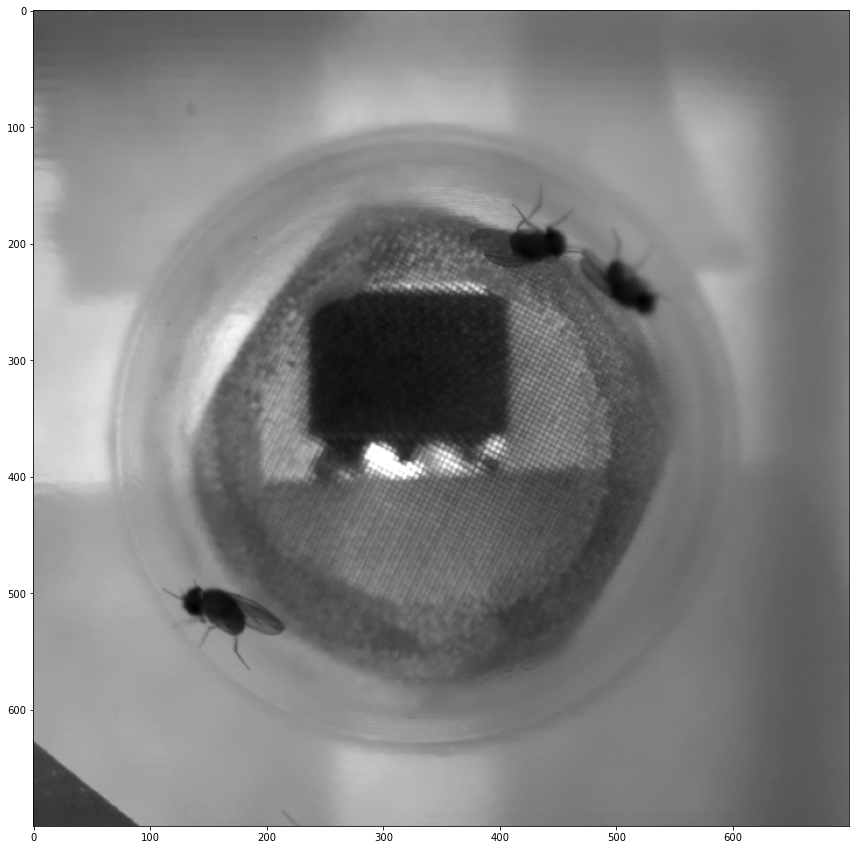

In [24]:
im = f['arr_0']
pl.figure(figsize=(15,15))
pl.imshow(im, cmap='gray')
     


In [ ]:
src_dir =  dst_dir

outfile = os.path.join(dst_dir, '%s.mp4' % acquisition)


In [ ]:
outfile = os.path.join(src_dir, '%s.mp4' % acquisition)
print(outfile)
#cmd='ffmpeg -y -r ' + '%.2f' % fps + ' -i ' + framedir+'/%06d.png -vcodec libx264 -f mp4 -pix_fmt yuv420p ' + outfile
cmd='ffmpeg -y -i ' + src_dir+'/%06d.png -vcodec libx264 -f mp4 -pix_fmt yuv420p ' + outfile

print(cmd)